## Volatilidad Implicita

In [10]:
import math
import numpy as np
from scipy.stats import norm
import sys
sys.path.append('..')

from Codigo.opcion_europea_bin import opcion_europea_bin
from Codigo.opcion_europea_bin_c import opcion_europea_bin_c
from Codigo.opcion_americana_bin import opcion_americana_bin
from Codigo.opcion_europea_bs import opcion_europea_bs



Me genero unas funciones auxiliares para definir el metodo de biseccion 

In [37]:
def samesign(a, b):
    return a * b > 0

def bisect(func, low, high, iters=100):
    'Find root of continuous function where f(low) and f(high) have opposite signs'

    assert not samesign(func(low), func(high))

    for i in range(iters):
        midpoint = (low + high) / 2.0
        if samesign(func(low), func(midpoint)):
            low = midpoint
        else:
            high = midpoint

    return midpoint

### Defino la funcion de volatilidad implicita. Busco el cero de la funcion O_T-O_M (opcion teorica menos opcion mercado)

In [38]:

def impvolfunc_bs(tipo, S, K, T, r, precio_mercado, div):
    
    
    func = lambda sigma: (opcion_europea_bs(tipo, S, K, T, r, sigma, div) - precio_mercado)

    impvol = bisect(func,0.00001, 3.0, 100)
    return impvol


def impvolfunc_bin(tipo, S, K, T, r, precio_mercado, div, pasos = 1000):
    func = lambda sigma: (opcion_americana_bin(tipo, S, K, T, r, sigma, div, pasos) - precio_mercado)
    
    impvol = bisect(func,0.0001, 3.0, 100)
    return impvol

Recorro el dataframe y copleto la volatilidad implicita

In [39]:
panel_nyse['volatilidad_implicita_bs'] = 0.0

for index in panel_nyse.index:
    
    tipo =  panel_nyse.CallPut.values[index]
    S = panel_nyse.Spot.values[index] 
    K = panel_nyse.Strike.values[index]
    T = panel_nyse.TTM.values[index]/365
    r = panel_nyse.Tasa.values[index]
    div = panel_nyse.Div.values[index]
    precio_mercado = panel_nyse.Avg.values[index]
    try:
        panel_nyse.volatilidad_implicita_bs.values[index] = impvolfunc_bs(tipo, S, K, T, r, precio_mercado, div)
    except:
        pass

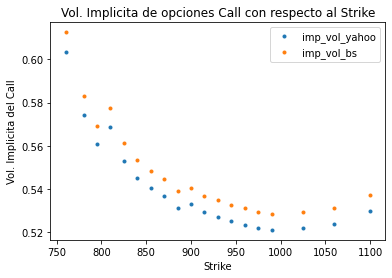

In [40]:
CP = "C"

TTM = TTMs[5]

Ks = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Strike.values
imp_vol_yahoo = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].impliedVolatility.values
imp_vol_bs = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].volatilidad_implicita_bs.values

    
space = 3
    
#plt.plot(Ks[0::space], precios_last[0::space], '.', label = 'Market - Last')
plt.plot(Ks[0::space], imp_vol_yahoo[0::space], '.',label = 'imp_vol_yahoo')
#plt.plot(Ks[0::space], precios_BS[0::space], '.',label = 'Model - Black Scholes')
plt.plot(Ks[0::space], imp_vol_bs[0::space], '.',label = 'imp_vol_bs')


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Vol. Implicita del Call')
plt.title('Vol. Implicita de opciones Call con respecto al Strike')
    
plt.show()

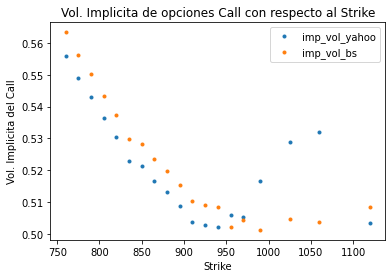

In [41]:
CP = "P"

TTM = TTMs[5]

Ks = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].Strike.values
imp_vol_yahoo = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].impliedVolatility.values
imp_vol_bs = panel_nyse[(panel_nyse.TTM == TTM) & (panel_nyse.CallPut == CP)].volatilidad_implicita_bs.values

    
space = 3
    
#plt.plot(Ks[0::space], precios_last[0::space], '.', label = 'Market - Last')
plt.plot(Ks[0::space], imp_vol_yahoo[0::space], '.',label = 'imp_vol_yahoo')
#plt.plot(Ks[0::space], precios_BS[0::space], '.',label = 'Model - Black Scholes')
plt.plot(Ks[0::space], imp_vol_bs[0::space], '.',label = 'imp_vol_bs')


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Vol. Implicita del Call')
plt.title('Vol. Implicita de opciones Call con respecto al Strike')
    
plt.show()